In [6]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from outlier_cleaner import outlierCleaner

In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )


In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


/Users/ggaasemyr/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Importing LinearRegression algorithm
from sklearn.linear_model import LinearRegression
# Training regression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

# Calculating regression score (r^2)
score = reg.score(ages_test, net_worths_test)

print("Slope:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Score:", score)

Slope: [[ 5.07793064]]
Intercept: [ 25.21002155]
Score: 0.878262470366


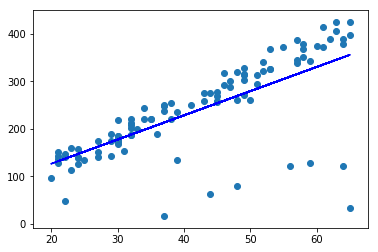

In [7]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [15]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")

In [36]:
diff = abs(predictions - net_worths_train)

diff

array([[  2.34374503e+01],
       [  2.95637995e+01],
       [  4.59332097e+01],
       [  2.86481987e+01],
       [  1.82744379e+01],
       [  3.22265869e+01],
       [  4.91992199e+01],
       [  1.68646751e+01],
       [  4.24268037e+00],
       [  7.39552180e+01],
       [  4.96749100e+01],
       [  7.67556106e+00],
       [  2.01002285e+01],
       [  7.63909350e+00],
       [  6.06197228e-01],
       [  1.62873489e+01],
       [  5.05069166e+01],
       [  3.21085239e+02],
       [  1.02546358e+01],
       [  4.43976191e+01],
       [  1.58743657e+01],
       [  3.34386424e+01],
       [  8.30817205e-02],
       [  3.07572273e+01],
       [  8.88356217e+01],
       [  2.98827765e+01],
       [  8.51185672e+00],
       [  6.63785936e+01],
       [  3.11622650e+00],
       [  1.03045633e+01],
       [  1.82763278e+01],
       [  3.46074429e+01],
       [  1.70962682e+01],
       [  1.96585667e+02],
       [  1.04336034e+01],
       [  3.00147084e+01],
       [  1.94384493e+01],
 

In [62]:
import pandas as pd

df = pd.DataFrame(predictions, columns=['pred'])
df['nwt'] = net_worths_train
df['diff'] = abs(df['nwt'] - df['pred'])

df

,pred,nwt,diff
0,314.652068,338.089518,23.437450
1,314.652068,344.215868,29.563800
2,197.859663,243.792873,45.933210
3,350.197583,378.845781,28.648199
4,152.158288,133.883850,18.274438
5,294.340346,326.566933,32.226587
6,340.041721,389.240941,49.199220
7,233.405178,250.269853,16.864675
8,131.846565,136.089245,4.242680
9,294.340346,368.295564,73.955218


In [49]:
df['remove'] = df['diff'] >= df['diff'].quantile(0.9)

In [77]:
df[['age', 'net_worth', 'error']]

,age,net_worth,error
0,57,338.089518,23.437450
1,57,344.215868,29.563800
2,34,243.792873,45.933210
3,64,378.845781,28.648199
4,25,133.883850,18.274438
5,53,326.566933,32.226587
6,62,389.240941,49.199220
7,41,250.269853,16.864675
8,21,136.089245,4.242680
9,53,368.295564,73.955218


In [79]:
df = pd.DataFrame(predictions, columns=['pred'])
df['age'] = ages_train
df['net_worth'] = net_worths_train
df['error'] = abs(df['net_worth'] - df['pred'])

#Defining which data points to remove
df['remove'] = df['error'] >= df['error'].quantile(0.9)

df_cleaned_data = df[df['remove'] == False][['age', 'net_worth', 'error']]
df_cleaned_data

cleaned_data = list(df_cleaned_data.itertuples(index=False, name=None))

In [9]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

outlierCleaner() is returning an empty list, no refitting to be done
